# lab 4

### import python libraries

In [1]:
import pandas 
import psycopg2
import configparser

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### connect to database

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

### question 3.1

In [5]:
q1_sql = """
    select * from gp2.student
"""

In [8]:
df = pandas.read_sql_query (q1_sql,conn)
df[:]

,student_email,student_name,student_maj
0,getzaj@dukes.jmu.edu,Alyssa Getz,Intelligence Analysis
1,rober6tl@dukes.jmu.edu,Theadora Robertson,Intelligence Analysis
2,hacketcb@dukes.jmu.edu,Caleb Hackett,Intelligence Analysis
3,jtblack222@gmail.com,Jacob Black,Intelligence Analysis


### question 3.2

In [9]:
sql_q2 = """
    select gp2.professor.prof_name,
    gp2.course.course_name
    from gp2.professor
    inner join gp2.course
    on gp2.professor.prof_email = gp2.course.prof_email
"""
                

In [10]:
df = pandas.read_sql_query (sql_q2,conn)
df[:]

,prof_name,course_name
0,Noel Hendrickson,Counterfactual Reasoning
1,Xuebin Wei,Data Mining
2,Stephen Marrin,Seminar on Issues in Intelligence Analysis
3,Claire Lyons,None
4,Claire Lyons,Money Laundering


### question 3.3

In [11]:
sql_q3 = """
    select course_num, 
    count (course_num) as enrolled
    from gp2.enroll_list
    group by course_num
"""

<AxesSubplot:xlabel='course_num'>

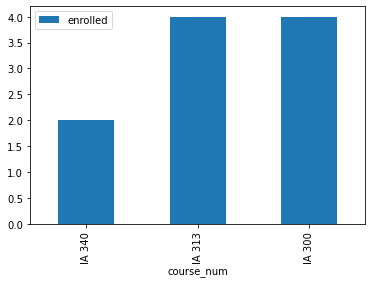

In [13]:
df = pandas.read_sql_query (sql_q3,conn)
df.plot.bar(y='enrolled', x='course_num')

### question 3.4

In [17]:
sql_q4 = """
    select gp2.professor.prof_name,
    count (gp2.course.course_name) as teaching_number
    from gp2.professor
    inner join gp2.course
    on gp2.professor.prof_email = gp2.course.prof_email
    group by professor.prof_name
"""

<AxesSubplot:xlabel='prof_name'>

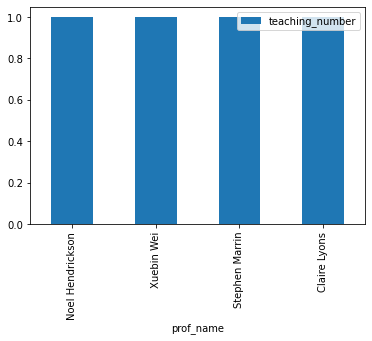

In [18]:
df = pandas.read_sql_query (sql_q4,conn)
df.plot.bar(y='teaching_number', x='prof_name')

### question 3.5

In [19]:
sql_q5_professor = """
    insert into gp2.professor(prof_email,prof_name,office_num)
                values('{}','{}','{}')
                                
                """.format('Bonsal@jmu.edu','Dudley Bonsal','ISAT 210')

In [20]:
cur.execute(sql_q5_professor)

In [21]:
conn.commit()

In [22]:
df = pandas.read_sql_query ('select * from gp2.professor',conn)
df[:]

,prof_email,prof_name,office_num
0,hendrix@jmu.edu,Noel Hendrickson,ISAT 322
1,weixx@jmu.edu,Xuebin Wei,ISAT 112
2,raabrw@jmu.edu,Ronald Raab,ISAT 156
3,marrinsp@jmu.edu,Stephen Marrin,ENGEO 2104
4,new_p_e,new_p_n,new_2nd_o
5,lyonsca@jmu.edu,Claire Lyons,None
6,Bonsal@jmu.edu,Dudley Bonsal,ISAT 210


In [30]:
sql_q5_course = """
    insert into gp2.course(course_num, course_name, room_num, prof_email)
                values('{}','{}','{}','{}')
                                
                """.format('ISAT 290', 'Foreign Nation Progression', 'ENGEO 2110', 'Bonsal@jmu.edu')

In [31]:
cur.execute(sql_q5_course)

In [29]:
conn.rollback()

In [32]:
conn.commit()

In [33]:
df = pandas.read_sql_query ('select * from gp2.course',conn)
df[:]

,course_num,course_name,room_num,prof_email
0,IA 313,Counterfactual Reasoning,ENGEO 1204,hendrix@jmu.edu
1,IA 340,Data Mining,ENGEO 2010,weixx@jmu.edu
2,IA 300,Seminar on Issues in Intelligence Analysis,ISAT 150,marrinsp@jmu.edu
3,154,None,None,lyonsca@jmu.edu
4,IA 480,Money Laundering,ISAT 0148,lyonsca@jmu.edu
5,ISAT 290,Foreign Nation Progression,ENGEO 2110,Bonsal@jmu.edu


### question 3.6

In [59]:
sql_q6_course = """
    update gp2.course
    set prof_email = '{}'
    where prof_email = '{}'
""".format('Bonsal@jmu.edu','lyonsca@jmu.edu')

In [60]:
cur.execute(sql_q6_course)

In [61]:
conn.commit()

In [62]:
df = pandas.read_sql_query ('select * from gp2.course',conn)
df[:]

,course_num,course_name,room_num,prof_email
0,IA 313,Counterfactual Reasoning,ENGEO 1204,hendrix@jmu.edu
1,IA 340,Data Mining,ENGEO 2010,weixx@jmu.edu
2,IA 300,Seminar on Issues in Intelligence Analysis,ISAT 150,marrinsp@jmu.edu
3,ISAT 290,Foreign Nation Progression,ENGEO 2110,Bonsal@jmu.edu
4,154,None,None,Bonsal@jmu.edu
5,IA 480,Money Laundering,ISAT 0148,Bonsal@jmu.edu


In [63]:
conn.rollback()

In [64]:
sql_q6_professor = """
    delete from gp2.professor
    where prof_email = '{}'
""".format('lyonsca@jmu.edu')

In [65]:
cur.execute(sql_q6_professor)

In [66]:
conn.commit()

In [67]:
df = pandas.read_sql_query ('select * from gp2.professor',conn)
df[:]

,prof_email,prof_name,office_num
0,hendrix@jmu.edu,Noel Hendrickson,ISAT 322
1,weixx@jmu.edu,Xuebin Wei,ISAT 112
2,raabrw@jmu.edu,Ronald Raab,ISAT 156
3,marrinsp@jmu.edu,Stephen Marrin,ENGEO 2104
4,new_p_e,new_p_n,new_2nd_o
5,Bonsal@jmu.edu,Dudley Bonsal,ISAT 210


### close connection

In [68]:
cur.close()
conn.close()